In [29]:
import os
import sys
import time
import random
import yaml
import warnings

import darkfield
import darkfield.mmmUtils_v2 as mu
import darkfield.rossendorfer_farbenliste as rofl
import darkfield.diffra_v2 as df

import numpy as np
from bash_config import write_bash
from darkfield.diffra_v2 import HOME 

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.colors import LogNorm
from importlib import reload

In [30]:
###################### PLOT DEFAULT PARAMETERS #####################
plt.rc('font',   size     =30)          # controls default text sizes
plt.rc('axes',   titlesize=30)  # fontsize of the axes title
plt.rc('axes',   labelsize=30)          # fontsize of the x and y labels
plt.rc('xtick',  labelsize=28) # fontsize of the tick labels
plt.rc('ytick',  labelsize=28) # fontsize of the tick labels
plt.rc('legend', fontsize =16)          # legend fontsize

Loading: /home/yu79deg/darkfield_p5438/Aime/pickles/LP_103_figs.pickle


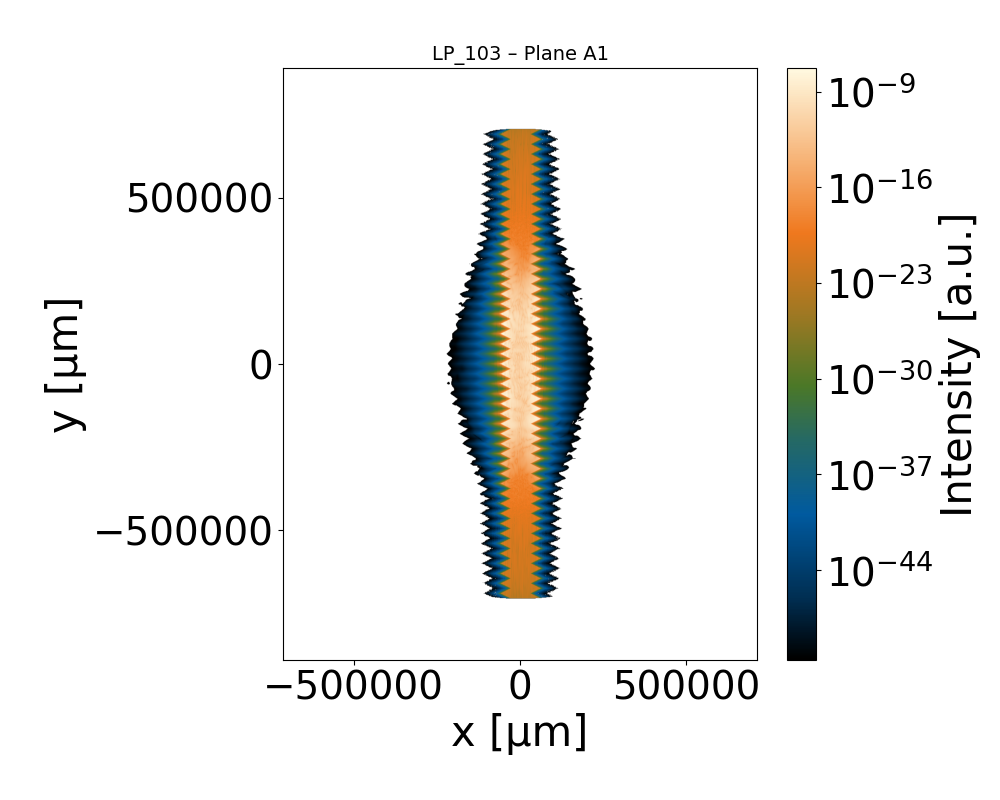

In [31]:
###################### PLOT OF A GIVEN PLANE ####################
%matplotlib widget

# ----------------- USER PARAMETERS -----------------
project_dir = '/home/yu79deg/darkfield_p5438/Aime'
yaml_tag = 'LP_103'  # Simulation name
plane_to_visualize = 'A1'  # Name of the plane to display
# ---------------------------------------------------

# Construct pickle file path
pickle_file = os.path.join(project_dir, 'pickles', f'{yaml_tag}_figs.pickle')
print(f"Loading: {pickle_file}")

# Load image dictionary
figs = mu.loadPickle(pickle_file)

# Visualize selected plane
for plane_name, data in figs.items():
    if plane_name != plane_to_visualize:
        continue

    img = data[0]
    pixel_size_m = data[2]
    pixel_size_um = pixel_size_m * 1e6  # Convert to microns

    # Calculate physical extent of the image
    N = img.shape[0]
    extent = (-N/2 * pixel_size_um, N/2 * pixel_size_um,
              -N/2 * pixel_size_um, N/2 * pixel_size_um)

    # Rescale image to intensity units
    img_scaled = img * pixel_size_m**2

    # Plot
    plt.figure(figsize=(10, 8))
    im = plt.imshow(img_scaled, cmap=rofl.cmap(), norm=LogNorm(), extent=extent)
    plt.axis('equal')
    plt.title(f'{yaml_tag} – Plane {plane_to_visualize}', fontsize=14)
    plt.xlabel('x [μm]')
    plt.ylabel('y [μm]')
    plt.colorbar(im, label='Intensity [a.u.]')
    plt.tight_layout()
    plt.show()

ipympl is installed.
